# Validaciones

In [55]:
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01
# path ='./data/RFReg_' # use your path
path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
allFiles

['./../data/Pobreza/pobreza_0.01_q2010-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-11-15.csv']

In [138]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [139]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO', 'NOMPROV']
    vars_ = ['CONDACT', 'CAT_OCUP', 'CAT_INAC']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv


## Cantidad Personas (2010) Por Condicion de ocupacion

### Total Pais

In [140]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### CONDACT

,Cantidad,Porcentaje
CONDACT,,
0,9704400.0,24.3
1,18570675.0,46.4
2,1328225.0,3.3
3,10402100.0,26.0
TOTAL,40005400.0,100.0


### CAT_OCUP

,Cantidad,Porcentaje
CAT_OCUP,,
0,20126800.0,50.3
1,67200.0,0.2
2,1076525.0,2.7
3,18724225.0,46.8
4,10650.0,0.0
TOTAL,40005400.0,100.0


### CAT_INAC

,Cantidad,Porcentaje
CAT_INAC,,
0,20151000.0,50.4
1,3892900.0,9.7
2,2400.0,0.0
3,8371300.0,20.9
4,3055700.0,7.6
5,3990000.0,10.0
6,35800.0,0.1
7,506300.0,1.3
TOTAL,40005400.0,100.0


### 31 Aglomerados

In [123]:
data = df10.loc[data.AGLO_si == 1]

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### CONDACT

,Cantidad,Porcentaje
CONDACT,,
0,5778200.0,22.9
1,12391225.0,49.1
2,935975.0,3.7
3,6139400.0,24.3
TOTAL,25244800.0,100.0


### CAT_OCUP

,Cantidad,Porcentaje
CAT_OCUP,,
0,11939900.0,47.3
1,46575.0,0.2
2,616975.0,2.4
3,12636050.0,50.1
4,5300.0,0.0
TOTAL,25244800.0,100.0


### CAT_INAC

,Cantidad,Porcentaje
CAT_INAC,,
0,13465600.0,53.3
1,2378800.0,9.4
2,1200.0,0.0
3,5010400.0,19.8
4,1692500.0,6.7
5,2427900.0,9.6
6,17900.0,0.1
7,250500.0,1.0
TOTAL,25244800.0,99.9


## Cantidad de Personas, por Aglomerado

In [141]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMAGLO', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### CONDACT

CONDACT,0,1,2,3
NOMAGLO,,,,
Bahia Blanca,62400.0,143075.0,10625.0,77600.0
CABA,466100.0,1644875.0,87425.0,669500.0
Catamarca,44400.0,84675.0,6825.0,39700.0
Cdro Rivadavia,39100.0,77625.0,5675.0,37600.0
Concordia,43900.0,66425.0,3575.0,36600.0
Cordoba,316100.0,713000.0,58300.0,360100.0
Corrientes,83600.0,155525.0,13175.0,87700.0
Formosa,56500.0,94625.0,6475.0,62800.0
Fuera de aglom.,3926200.0,6179450.0,392250.0,4262700.0


### CAT_OCUP

CAT_OCUP,0,1,2,3,4
NOMAGLO,,,,,
Bahia Blanca,140750.0,1075.0,7350.0,144525.0,0.0
CABA,1135075.0,8425.0,76625.0,1647675.0,100.0
Catamarca,84400.0,100.0,4025.0,86775.0,300.0
Cdro Rivadavia,77025.0,200.0,2400.0,80375.0,0.0
Concordia,80700.0,100.0,3600.0,66100.0,0.0
Cordoba,677975.0,1900.0,33900.0,733725.0,0.0
Corrientes,172000.0,675.0,8450.0,158675.0,200.0
Formosa,119375.0,100.0,4000.0,96925.0,0.0
Fuera de aglom.,8186900.0,20625.0,459550.0,6088175.0,5350.0


### CAT_INAC

CAT_INAC,0,1,2,3,4,5,6,7
NOMAGLO,,,,,,,,
Bahia Blanca,155200.0,33100.0,0.0,62000.0,17700.0,23800.0,100.0,1800.0
CABA,1752400.0,361700.0,200.0,416900.0,121100.0,197800.0,800.0,17000.0
Catamarca,91500.0,12300.0,100.0,41600.0,10200.0,17700.0,0.0,2200.0
Cdro Rivadavia,83400.0,11000.0,0.0,30900.0,13700.0,19200.0,0.0,1800.0
Concordia,70000.0,13800.0,0.0,34000.0,10700.0,19800.0,100.0,2100.0
Cordoba,777200.0,142000.0,0.0,289500.0,91000.0,132800.0,1000.0,14000.0
Corrientes,169300.0,24700.0,0.0,80300.0,25800.0,33200.0,500.0,6200.0
Formosa,101400.0,14700.0,0.0,58900.0,19600.0,21600.0,100.0,4100.0
Fuera de aglom.,6685400.0,1514100.0,1200.0,3360900.0,1363200.0,1562100.0,17900.0,255800.0


## Cantidad de Personas, por Provincia

In [142]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMPROV', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### CONDACT

CONDACT,0,1,2,3
NOMPROV,,,,
Buenos Aires,3684600.0,7580350.0,550450.0,3800900.0
Catamarca,106900.0,155475.0,13325.0,97200.0
Chaco,302700.0,410850.0,26350.0,309000.0
Chubut,128500.0,246075.0,16825.0,113300.0
Ciudad Autónoma de Buenos Aires,466100.0,1645575.0,87625.0,669600.0
Corrientes,264500.0,385400.0,24900.0,307000.0
Córdoba,754900.0,1544975.0,104125.0,881500.0
Entre Ríos,313300.0,545300.0,28700.0,348400.0
Formosa,161900.0,199275.0,11925.0,161800.0


### CAT_OCUP

CAT_OCUP,0,1,2,3,4
NOMPROV,,,,,
Buenos Aires,7499750.0,30650.0,438175.0,7645200.0,2525.0
Catamarca,202900.0,200.0,9500.0,160000.0,300.0
Chaco,612500.0,900.0,32575.0,402125.0,800.0
Chubut,239325.0,500.0,11400.0,253475.0,0.0
Ciudad Autónoma de Buenos Aires,1135175.0,8425.0,76625.0,1648575.0,100.0
Corrientes,573075.0,1750.0,25350.0,381125.0,500.0
Córdoba,1637325.0,5000.0,91125.0,1551675.0,375.0
Entre Ríos,662300.0,1600.0,34575.0,537025.0,200.0
Formosa,324075.0,125.0,15900.0,194400.0,400.0


### CAT_INAC

CAT_INAC,0,1,2,3,4,5,6,7
NOMPROV,,,,,,,,
Buenos Aires,8221800.0,1511500.0,1100.0,3077100.0,1103900.0,1547500.0,11600.0,141800.0
Catamarca,177800.0,28700.0,100.0,96300.0,26600.0,36600.0,200.0,6600.0
Chaco,440200.0,82700.0,100.0,277000.0,109300.0,113300.0,1300.0,25000.0
Chubut,269700.0,37000.0,0.0,104200.0,35200.0,54200.0,300.0,4100.0
Ciudad Autónoma de Buenos Aires,1753300.0,361700.0,200.0,417000.0,121100.0,197800.0,800.0,17000.0
Corrientes,411000.0,95300.0,100.0,239700.0,102600.0,109100.0,1600.0,22400.0
Córdoba,1669100.0,360200.0,100.0,668300.0,241100.0,308600.0,3000.0,35100.0
Entre Ríos,576700.0,134300.0,0.0,271100.0,106800.0,126800.0,1000.0,19000.0
Formosa,211500.0,40900.0,0.0,150300.0,55500.0,62100.0,600.0,14000.0


In [108]:
import matplotlib.pyplot as plt

## Cantidad Personas, Series de Tiempo

### CONDACT

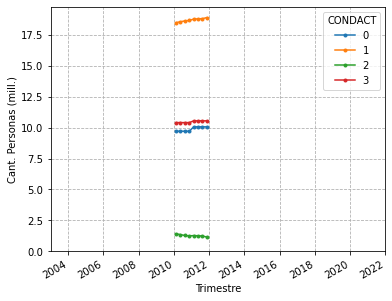

### CAT_OCUP

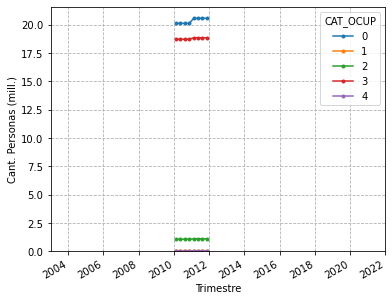

### CAT_INAC

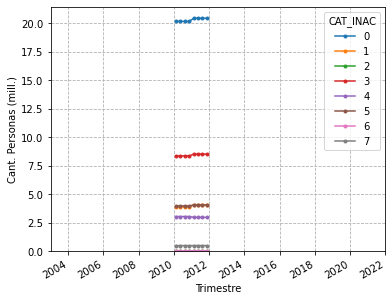

In [109]:
for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))

    fig, axs = plt.subplots(1, figsize = (6, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6

    table.plot(ax = axs, marker = '.')
    axs.grid(linestyle = '--')
    axs.set_xlim('2003', '2022')
    axs.set_ylim(0, )
    axs.set_xlabel('Trimestre')
    axs.set_ylabel('Cant. Personas (mill.)')
    plt.show()

## Cantidad Personas (2010) Por INGRESO SI/NO

### Total Pais

In [144]:
df_list = []
for f in allFiles:
    print(f)
    groupers = ['AGLOMERADO', 'NOMPROV']
    vars_ = ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
    
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv


In [145]:
data = df10

for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### INGRESO

,Cantidad,Porcentaje
INGRESO,,
0,16473925.0,41.2
1,23531475.0,58.8
TOTAL,40005400.0,100.0


### INGRESO_NLB

,Cantidad,Porcentaje
INGRESO_NLB,,
0,34191875.0,85.5
1,5813525.0,14.5
TOTAL,40005400.0,100.0


### INGRESO_JUB

,Cantidad,Porcentaje
INGRESO_JUB,,
0,35307875.0,88.3
1,4697525.0,11.7
TOTAL,40005400.0,100.0


### INGRESO_SBS

,Cantidad,Porcentaje
INGRESO_SBS,,
0,39469250.0,98.7
1,536150.0,1.3
TOTAL,40005400.0,100.0


### 31 Aglomerados

In [146]:
data = df10.loc[data.AGLO_si == 1]

for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### INGRESO

,Cantidad,Porcentaje
INGRESO,,
0,9856850.0,39.0
1,15387950.0,61.0
TOTAL,25244800.0,100.0


### INGRESO_NLB

,Cantidad,Porcentaje
INGRESO_NLB,,
0,21703925.0,86.0
1,3540875.0,14.0
TOTAL,25244800.0,100.0


### INGRESO_JUB

,Cantidad,Porcentaje
INGRESO_JUB,,
0,22330825.0,88.5
1,2913975.0,11.5
TOTAL,25244800.0,100.0


### INGRESO_SBS

,Cantidad,Porcentaje
INGRESO_SBS,,
0,24993150.0,99.0
1,251650.0,1.0
TOTAL,25244800.0,100.0


## Cantidad de Personas, por Aglomerado

In [147]:
data = df10

for col in ['INGRESO', 'INGRESO_JUB']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMAGLO', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### INGRESO

INGRESO,0,1
NOMAGLO,,
Bahia Blanca,110325.0,183375.0
CABA,807600.0,2060300.0
Catamarca,74250.0,101350.0
Cdro Rivadavia,69725.0,90275.0
Concordia,66975.0,83525.0
Cordoba,550750.0,896750.0
Corrientes,149975.0,190025.0
Formosa,103475.0,116925.0
Fuera de aglom.,6617075.0,8143525.0


### INGRESO_JUB

INGRESO_JUB,0,1
NOMAGLO,,
Bahia Blanca,253775.0,39925.0
CABA,2407000.0,460900.0
Catamarca,160700.0,14900.0
Cdro Rivadavia,146600.0,13400.0
Concordia,134200.0,16300.0
Cordoba,1276925.0,170575.0
Corrientes,311500.0,28500.0
Formosa,202775.0,17625.0
Fuera de aglom.,12977050.0,1783550.0


## Cantidad de Personas, por Provincia

In [148]:
data = df10

for col in ['INGRESO', 'INGRESO_JUB']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMPROV', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### INGRESO

INGRESO,0,1
NOMPROV,,
Buenos Aires,6163700.0,9452600.0
Catamarca,175150.0,197750.0
Chaco,508075.0,540825.0
Chubut,211025.0,293675.0
Ciudad Autónoma de Buenos Aires,807900.0,2061000.0
Corrientes,464275.0,517525.0
Córdoba,1300525.0,1984975.0
Entre Ríos,530125.0,705575.0
Formosa,269350.0,265550.0


### INGRESO_JUB

INGRESO_JUB,0,1
NOMPROV,,
Buenos Aires,13750750.0,1865550.0
Catamarca,338300.0,34600.0
Chaco,956100.0,92800.0
Chubut,459700.0,45000.0
Ciudad Autónoma de Buenos Aires,2408000.0,460900.0
Corrientes,876175.0,105625.0
Córdoba,2857625.0,427875.0
Entre Ríos,1077100.0,158600.0
Formosa,487375.0,47525.0


## Cantidad Personas, Series de Tiempo

### INGRESO

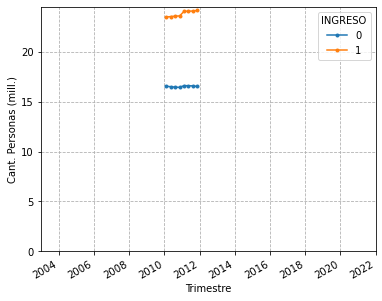

### INGRESO_NLB

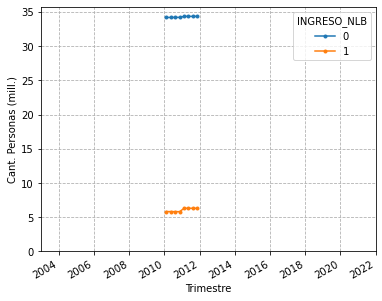

### INGRESO_JUB

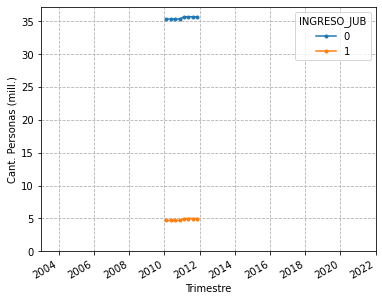

### INGRESO_SBS

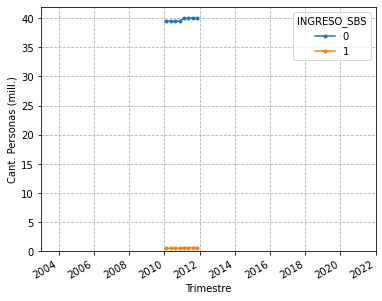

In [103]:
for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))

    fig, axs = plt.subplots(1, figsize = (6, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6

    table.plot(ax = axs, marker = '.')
    axs.grid(linestyle = '--')
    axs.set_xlim('2003', '2022')
    axs.set_ylim(0, )
    axs.set_xlabel('Trimestre')
    axs.set_ylabel('Cant. Personas (mill.)')
    plt.show()

## Cantidad Personas (2010) Por Formalidad Laboral

### Total Pais

In [110]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO']
    vars_ = ['PP07K']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'AGLOMERADO'] + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv


In [113]:
data = df10

for col in ['PP07K']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### PP07K

,Cantidad,Porcentaje
PP07K,,
0,22511350.0,56.3
1,12079900.0,30.2
2,8275.0,0.0
3,21150.0,0.1
4,5382675.0,13.5
5,1475.0,0.0
9,575.0,0.0
TOTAL,40005400.0,100.1


### 31 Aglomerados

In [114]:
data = df10.loc[data.AGLO_si == 1]

for col in ['PP07K']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### PP07K

,Cantidad,Porcentaje
PP07K,,
0,13478475.0,53.4
1,8494500.0,33.6
2,4675.0,0.0
3,16550.0,0.1
4,3248950.0,12.9
5,1275.0,0.0
9,375.0,0.0
TOTAL,25244800.0,100.0


## Cantidad Personas, Series de Tiempo

### PP07K

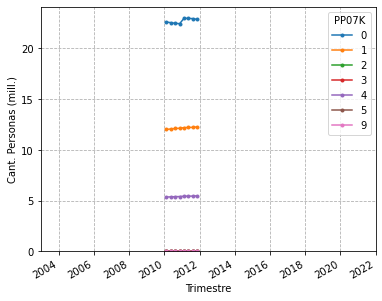

In [115]:
for col in ['PP07K']:
    display(Markdown('### '+col))

    fig, axs = plt.subplots(1, figsize = (6, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6

    table.plot(ax = axs, marker = '.')
    axs.grid(linestyle = '--')
    axs.set_xlim('2003', '2022')
    axs.set_ylim(0, )
    axs.set_xlabel('Trimestre')
    axs.set_ylabel('Cant. Personas (mill.)')
    plt.show()